# Prediction Of Stress And Diabetic Retinopathy Using Touch Screen Data

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import xgboost as xgb
from warnings import filterwarnings

In [2]:
filterwarnings(action='ignore')
data=pd.read_csv("projects.csv")
print("success")

success


In [3]:
data.head()
print(data.shape)

(150, 14)


In [4]:
data.describe(include='all')
data.corr()

Patient ID  Diastolic BP  SerumInsulin  Body Mass Index  \
Patient ID              1.000000      0.045044      0.009092        -0.016161   
Diastolic BP            0.045044      1.000000      0.148815         0.036321   
SerumInsulin            0.009092      0.148815      1.000000         0.092890   
Body Mass Index        -0.016161      0.036321      0.092890         1.000000   
DiabetesPedigree        0.026433      0.048273      0.027259        -0.002734   
Age                    -0.070867      0.094975      0.070638        -0.028453   
Respiratory Rate       -0.137197     -0.028201     -0.156942         0.021026   
Temperature             0.132391      0.065099      0.132718         0.015294   
Body Oxygen level       0.131059      0.062075      0.129342         0.009065   
Eye Moment Rate        -0.072784     -0.058015     -0.134662         0.083703   
Sleeping Rate in Hrs    0.103283      0.055724      0.098410        -0.026478   
Heart Rate             -0.137197     -0.028201     -0.156942         0.021026   
Diabetes               -0.070874      0.142397      0.322907         0.160393   
Stress                 -0.119658     -0.051015     -0.137266         0.030707   

                      DiabetesPedigree       Age  Respiratory Rate  \
Patient ID                    0.026433 -0.070867         -0.137197   
Diastolic BP                  0.048273  0.094975         -0.028201   
SerumInsulin                  0.027259  0.070638         -0.156942   
Body Mass Index              -0.002734 -0.028453          0.021026   
DiabetesPedigree              1.000000  0.178271         -0.002037   
Age                           0.178271  1.000000          0.059407   
Respiratory Rate             -0.002037  0.059407          1.000000   
Temperature                   0.019928 -0.123189         -0.892885   
Body Oxygen level             0.021849 -0.122671         -0.894037   
Eye Moment Rate              -0.045369  0.012022          0.937862   
Sleeping Rate in Hrs          0.008371 -0.094388         -0.892720   
Heart Rate                   -0.002037  0.059407          1.000000   
Diabetes                      0.085241  0.327302         -0.085608   
Stress                       -0.017361  0.078888          0.966138   

                      Temperature  Body Oxygen level  Eye Moment Rate  \
Patient ID               0.132391           0.131059        -0.072784   
Diastolic BP             0.065099           0.062075        -0.058015   
SerumInsulin             0.132718           0.129342        -0.134662   
Body Mass Index          0.015294           0.009065         0.083703   
DiabetesPedigree         0.019928           0.021849        -0.045369   
Age                     -0.123189          -0.122671         0.012022   
Respiratory Rate        -0.892885          -0.894037         0.937862   
Temperature              1.000000           0.998144        -0.844439   
Body Oxygen level        0.998144           1.000000        -0.851180   
Eye Moment Rate         -0.844439          -0.851180         1.000000   
Sleeping Rate in Hrs     0.953613           0.948807        -0.880483   
Heart Rate              -0.892885          -0.894037         0.937862   
Diabetes                 0.043239           0.038663        -0.064846   
Stress                  -0.962340          -0.961681         0.945453   

                      Sleeping Rate in Hrs  Heart Rate  Diabetes    Stress  
Patient ID                        0.103283   -0.137197 -0.070874 -0.119658  
Diastolic BP                      0.055724   -0.028201  0.142397 -0.051015  
SerumInsulin                      0.098410   -0.156942  0.322907 -0.137266  
Body Mass Index                  -0.026478    0.021026  0.160393  0.030707  
DiabetesPedigree                  0.008371   -0.002037  0.085241 -0.017361  
Age                              -0.094388    0.059407  0.327302  0.078888  
Respiratory Rate                 -0.892720    1.000000 -0.085608  0.966138  
Temperature                       0.953613 

In [5]:
print(data['Diabetes'].value_counts())

Diabetes
0    104
1     46
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


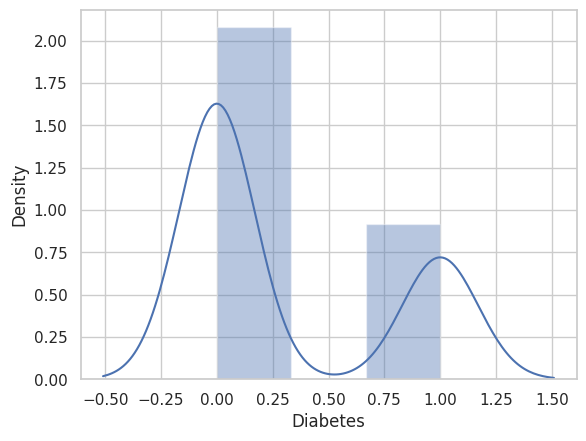

In [48]:
print(sns.distplot(data['Diabetes']))

Axes(0.125,0.11;0.775x0.77)


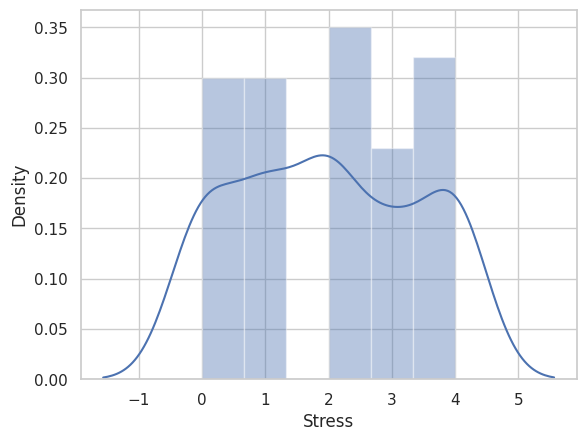

In [49]:
print(sns.distplot(data['Stress']))

Axes(0.125,0.11;0.775x0.77)


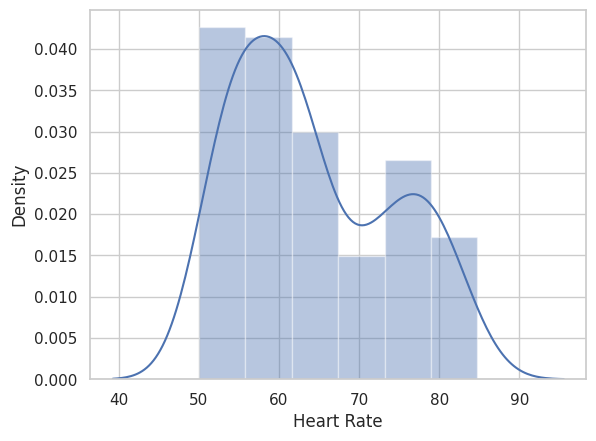

In [50]:
print(sns.distplot(data['Heart Rate']))

Axes(0.125,0.11;0.775x0.77)


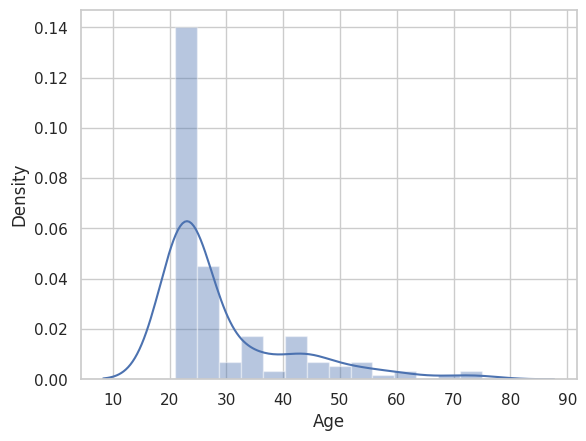

In [51]:
print(sns.distplot(data['Age']))

Axes(0.125,0.11;0.775x0.77)


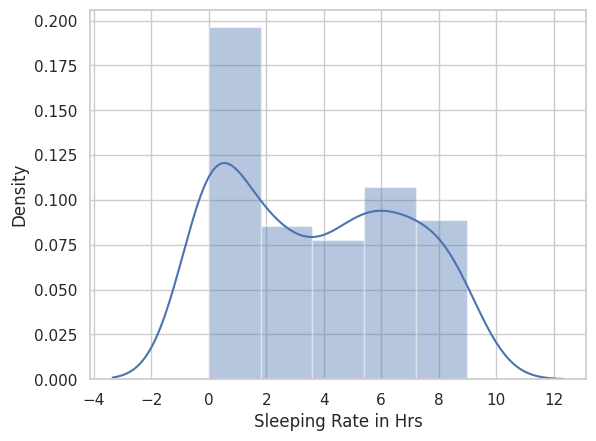

In [52]:
print(sns.distplot(data['Sleeping Rate in Hrs']))

Axes(0.125,0.11;0.775x0.77)


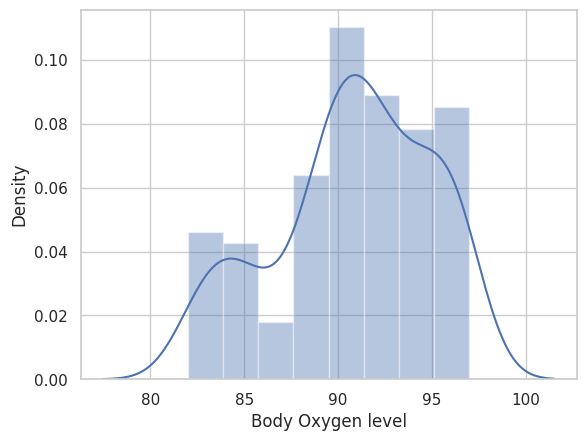

In [53]:
print(sns.distplot(data['Body Oxygen level']))

Axes(0.125,0.11;0.775x0.77)


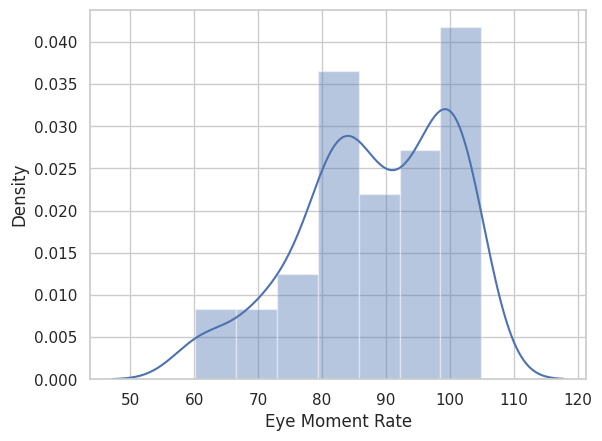

In [54]:
print(sns.distplot(data['Eye Moment Rate']))

Axes(0.125,0.11;0.775x0.77)


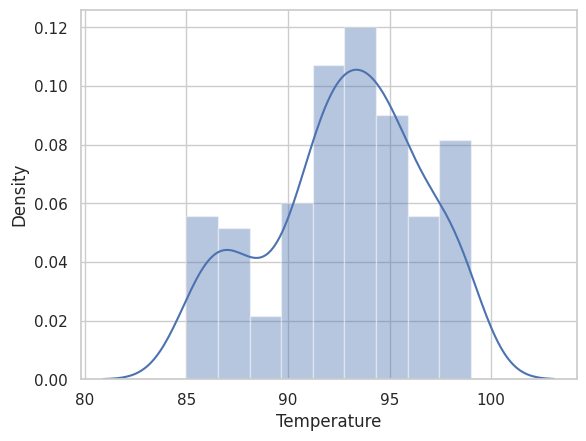

In [55]:
print(sns.distplot(data['Temperature']))

Axes(0.125,0.11;0.775x0.77)


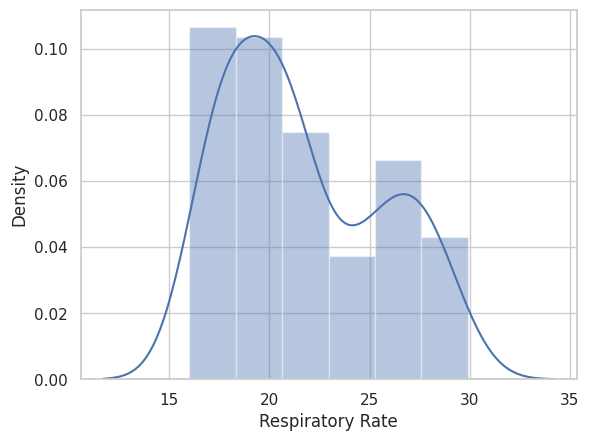

In [56]:
print(sns.distplot(data['Respiratory Rate']))

Axes(0.125,0.11;0.775x0.77)


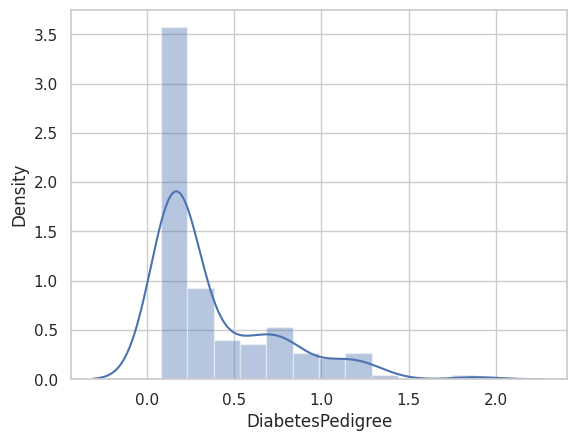

In [57]:
print(sns.distplot(data['DiabetesPedigree']))

Axes(0.125,0.11;0.775x0.77)


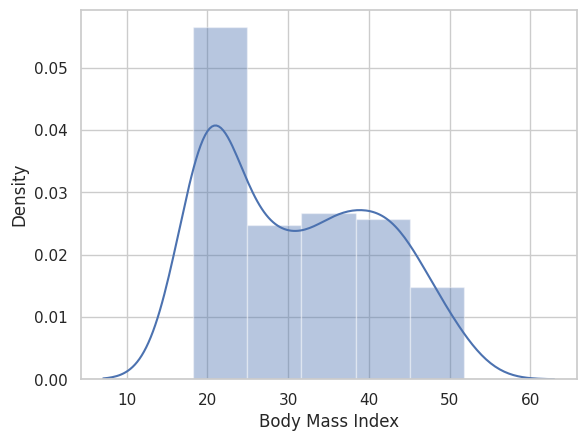

In [59]:
print(sns.distplot(data['Body Mass Index']))

Axes(0.125,0.11;0.775x0.77)


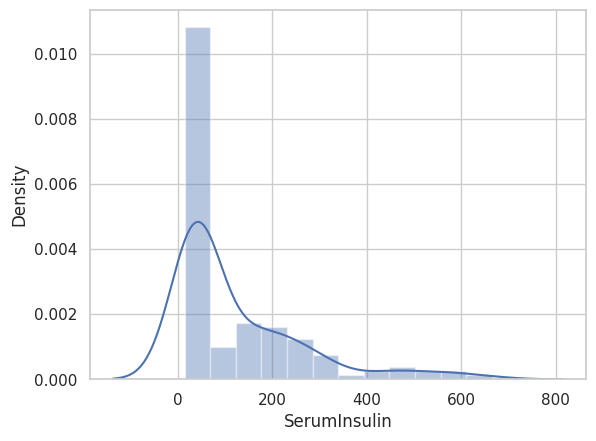

In [60]:
print(sns.distplot(data['SerumInsulin']))

Axes(0.125,0.11;0.775x0.77)


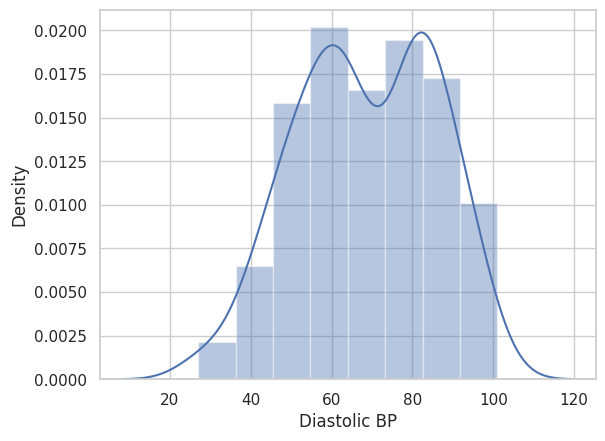

In [61]:
print(sns.distplot(data['Diastolic BP']))

Axes(0.125,0.11;0.775x0.77)


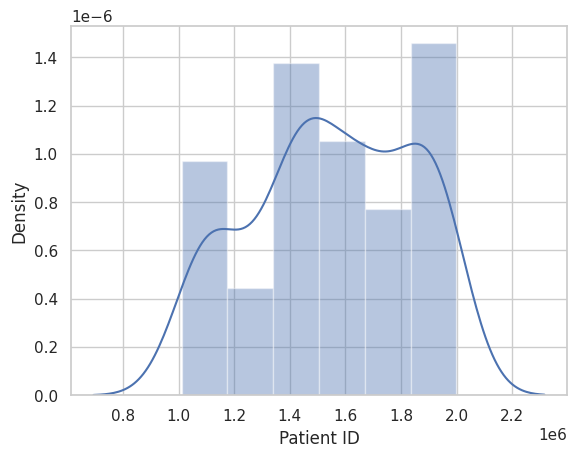

In [63]:
print(sns.distplot(data['Patient ID']))

Patient ID                 Axes(0.125,0.712609;0.168478x0.167391)
Diastolic BP            Axes(0.327174,0.712609;0.168478x0.167391)
SerumInsulin            Axes(0.529348,0.712609;0.168478x0.167391)
Body Mass Index         Axes(0.731522,0.712609;0.168478x0.167391)
DiabetesPedigree           Axes(0.125,0.511739;0.168478x0.167391)
Age                     Axes(0.327174,0.511739;0.168478x0.167391)
Respiratory Rate        Axes(0.529348,0.511739;0.168478x0.167391)
Temperature             Axes(0.731522,0.511739;0.168478x0.167391)
Body Oxygen level           Axes(0.125,0.31087;0.168478x0.167391)
Eye Moment Rate          Axes(0.327174,0.31087;0.168478x0.167391)
Sleeping Rate in Hrs     Axes(0.529348,0.31087;0.168478x0.167391)
Heart Rate               Axes(0.731522,0.31087;0.168478x0.167391)
Diabetes                       Axes(0.125,0.11;0.168478x0.167391)
Stress                      Axes(0.327174,0.11;0.168478x0.167391)
dtype: object


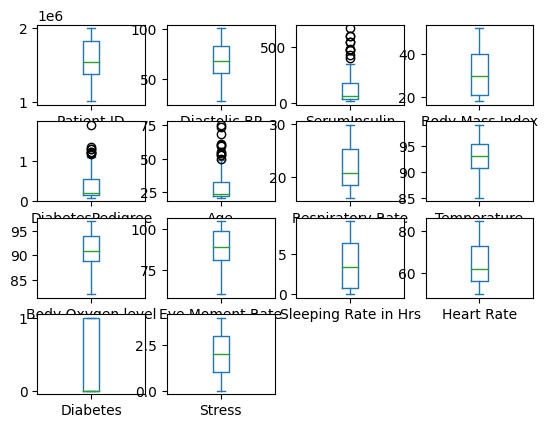

In [9]:
print(data.plot(kind ='box',subplots = True, layout =(4,4),sharex = False))

array([[<Axes: title={'center': 'Patient ID'}>,
        <Axes: title={'center': 'Diastolic BP'}>,
        <Axes: title={'center': 'SerumInsulin'}>,
        <Axes: title={'center': 'Body Mass Index'}>],
       [<Axes: title={'center': 'DiabetesPedigree'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Respiratory Rate'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'Body Oxygen level'}>,
        <Axes: title={'center': 'Eye Moment Rate'}>,
        <Axes: title={'center': 'Sleeping Rate in Hrs'}>,
        <Axes: title={'center': 'Heart Rate'}>],
       [<Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'Stress'}>, <Axes: >, <Axes: >]],
      dtype=object)

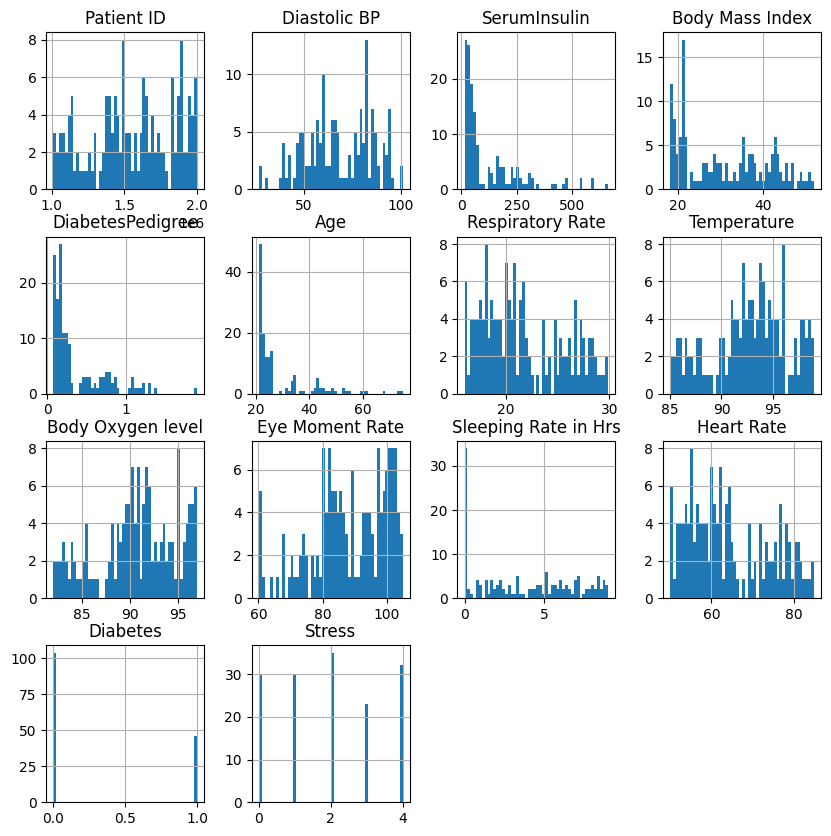

In [10]:
data.hist(figsize=(10,10),bins=50)

<Axes: >

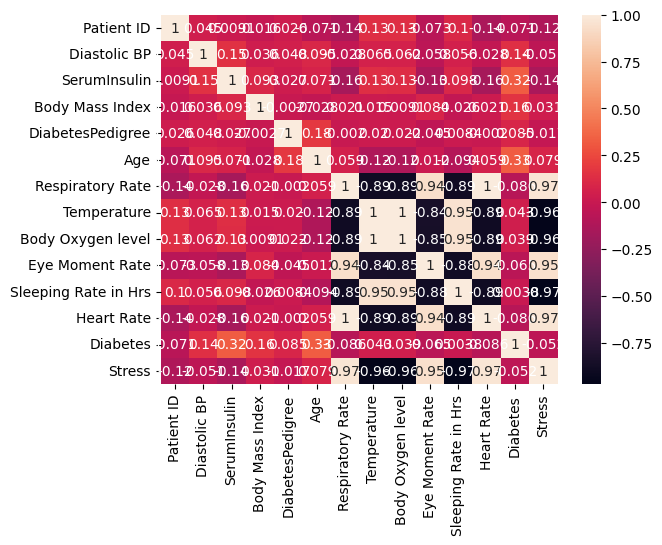

In [14]:
corr = data.corr()
sns.heatmap(corr,annot=True)

<Axes: >

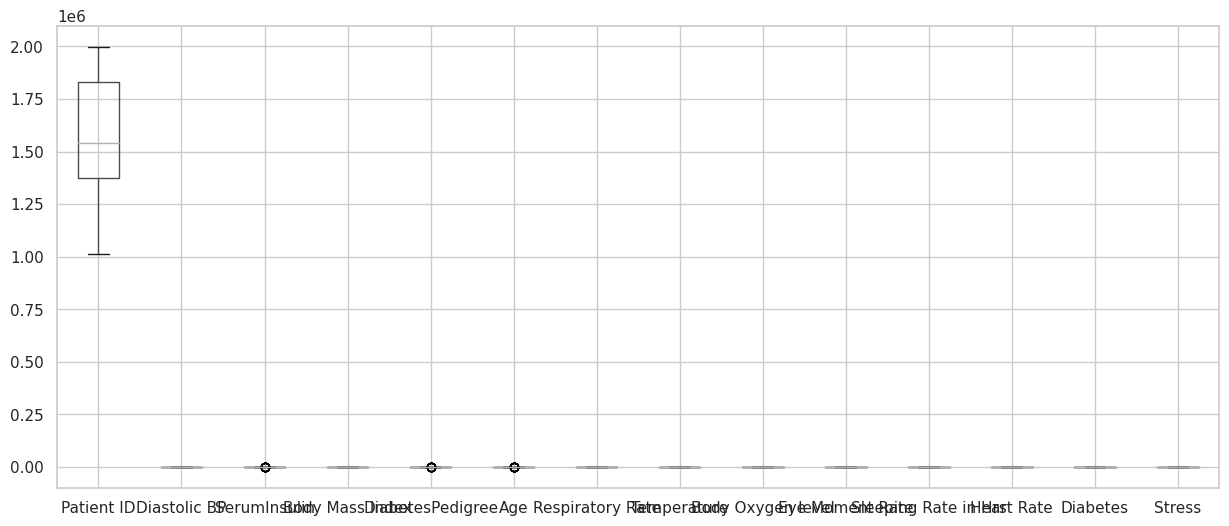

In [16]:
sns.set(style="whitegrid")
(data.boxplot(figsize=(15,6)))

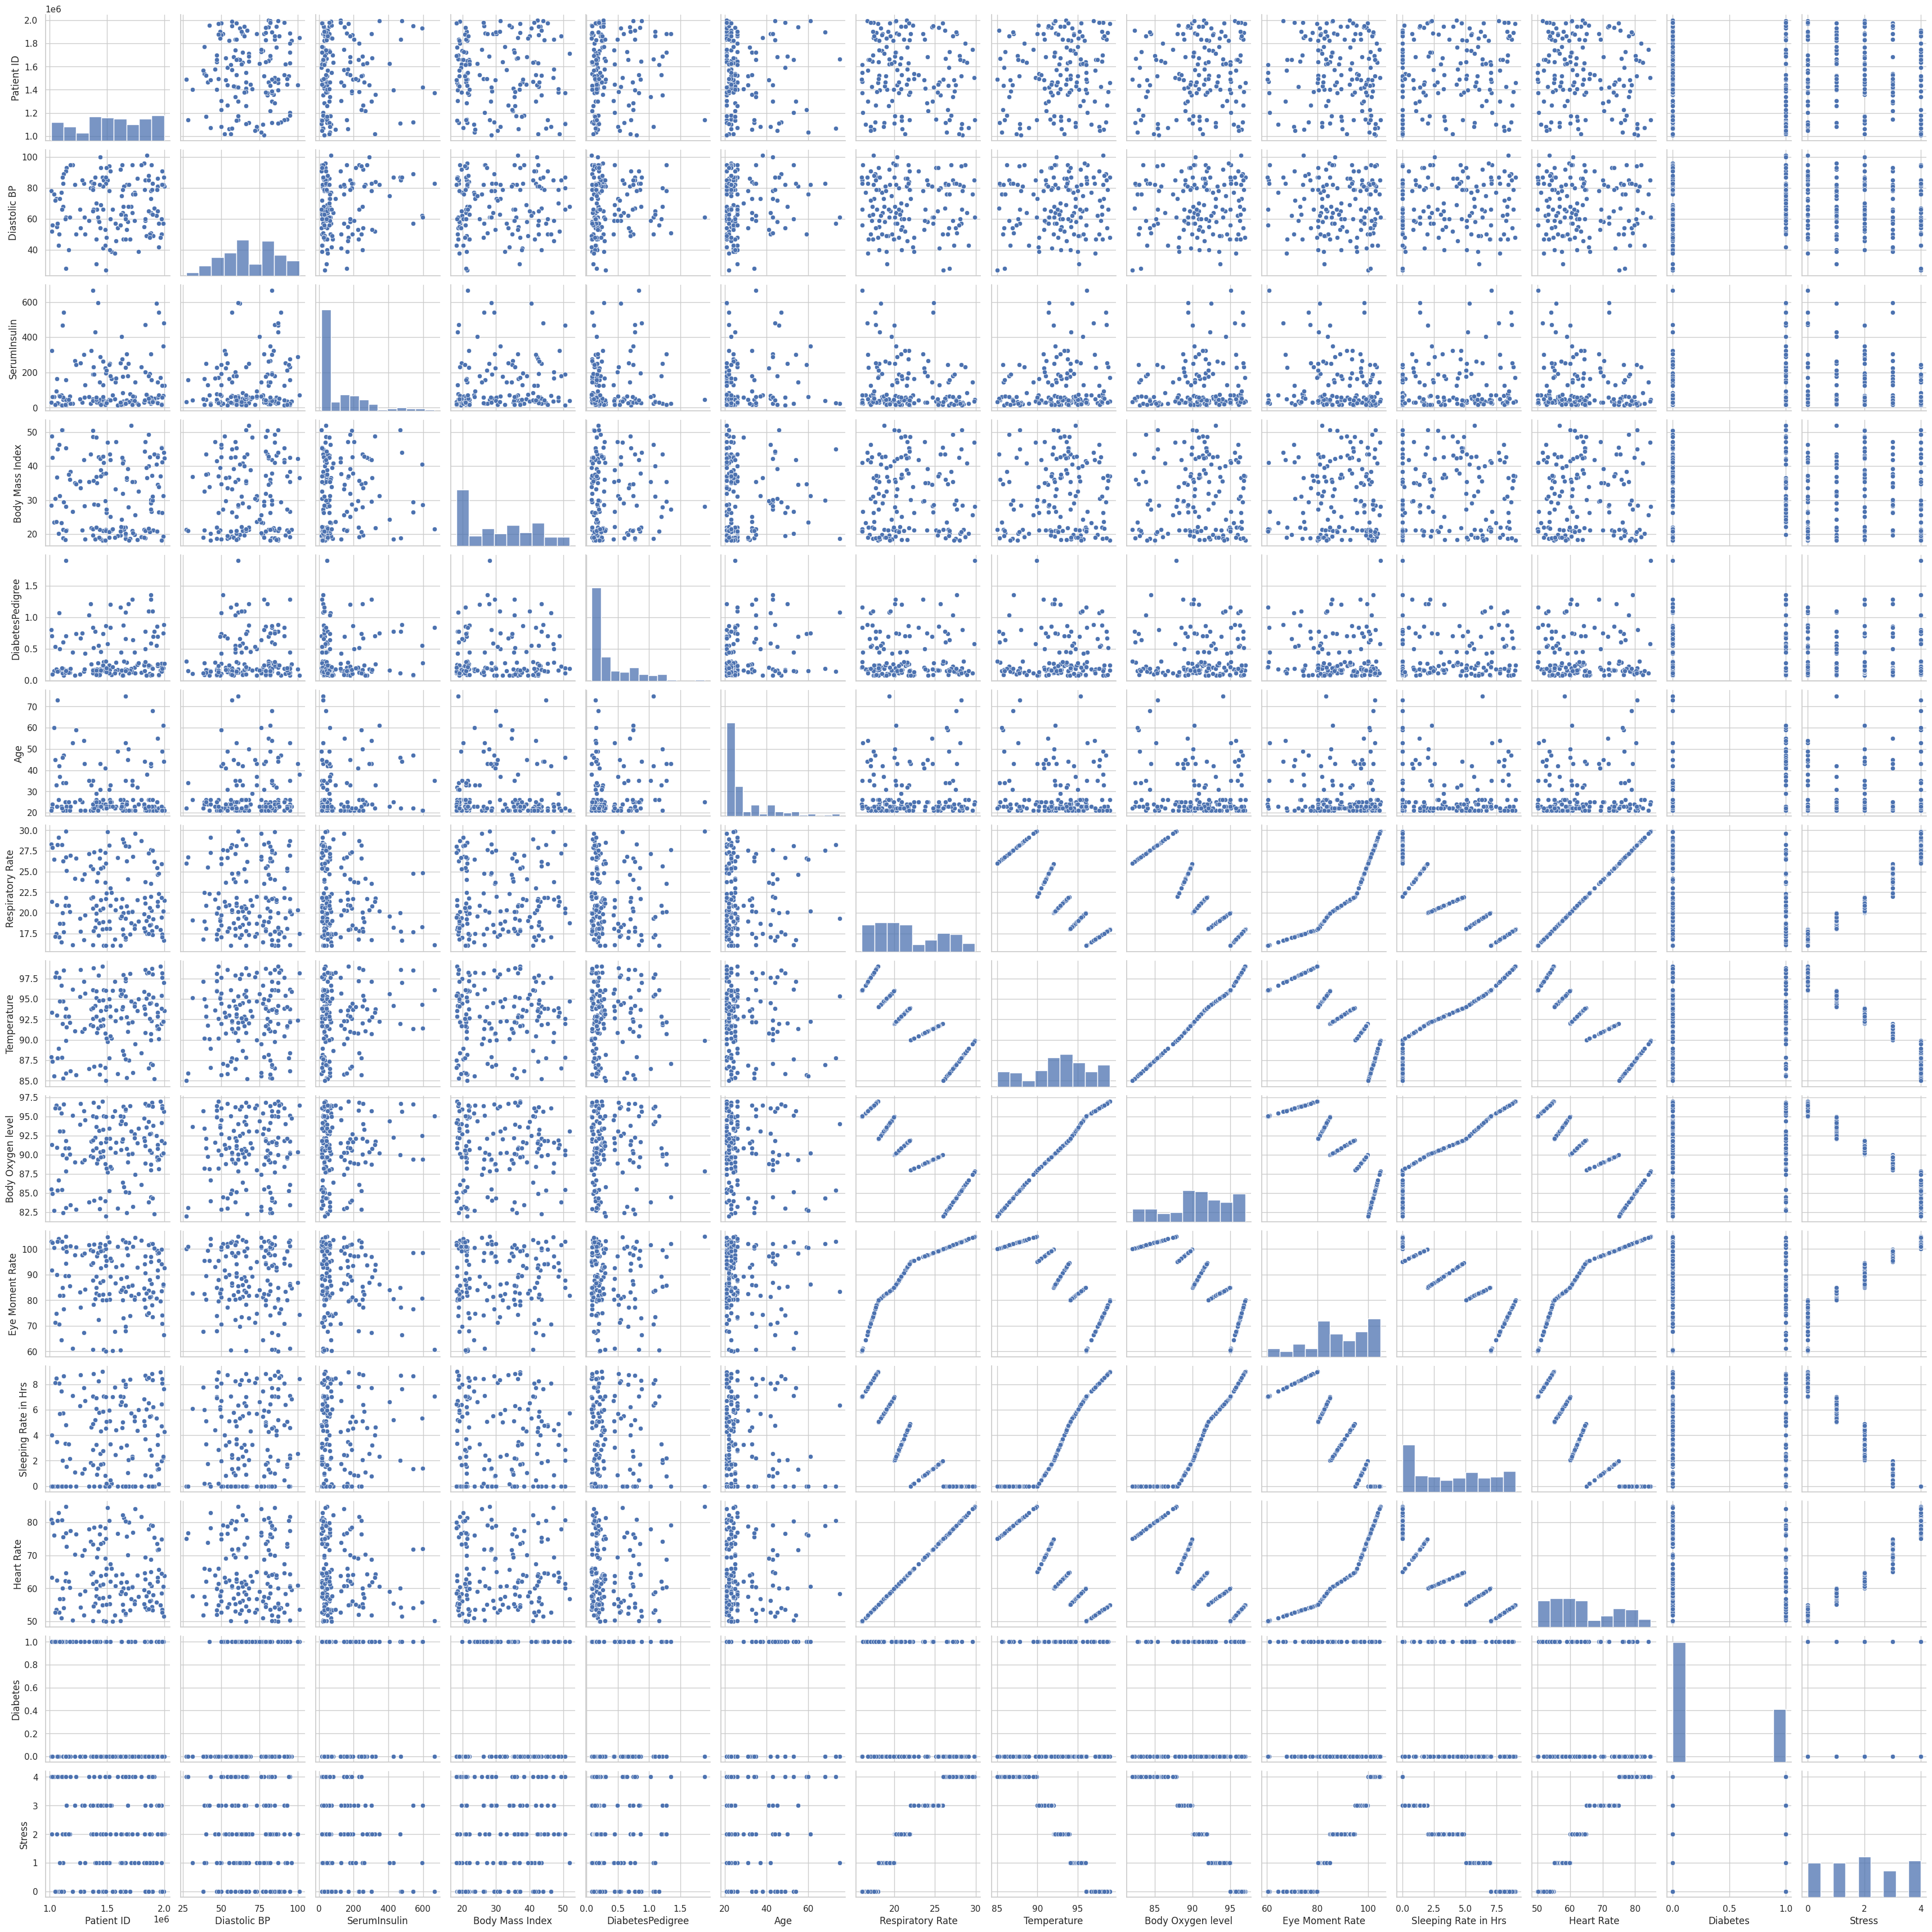

In [17]:
sns.pairplot(data)

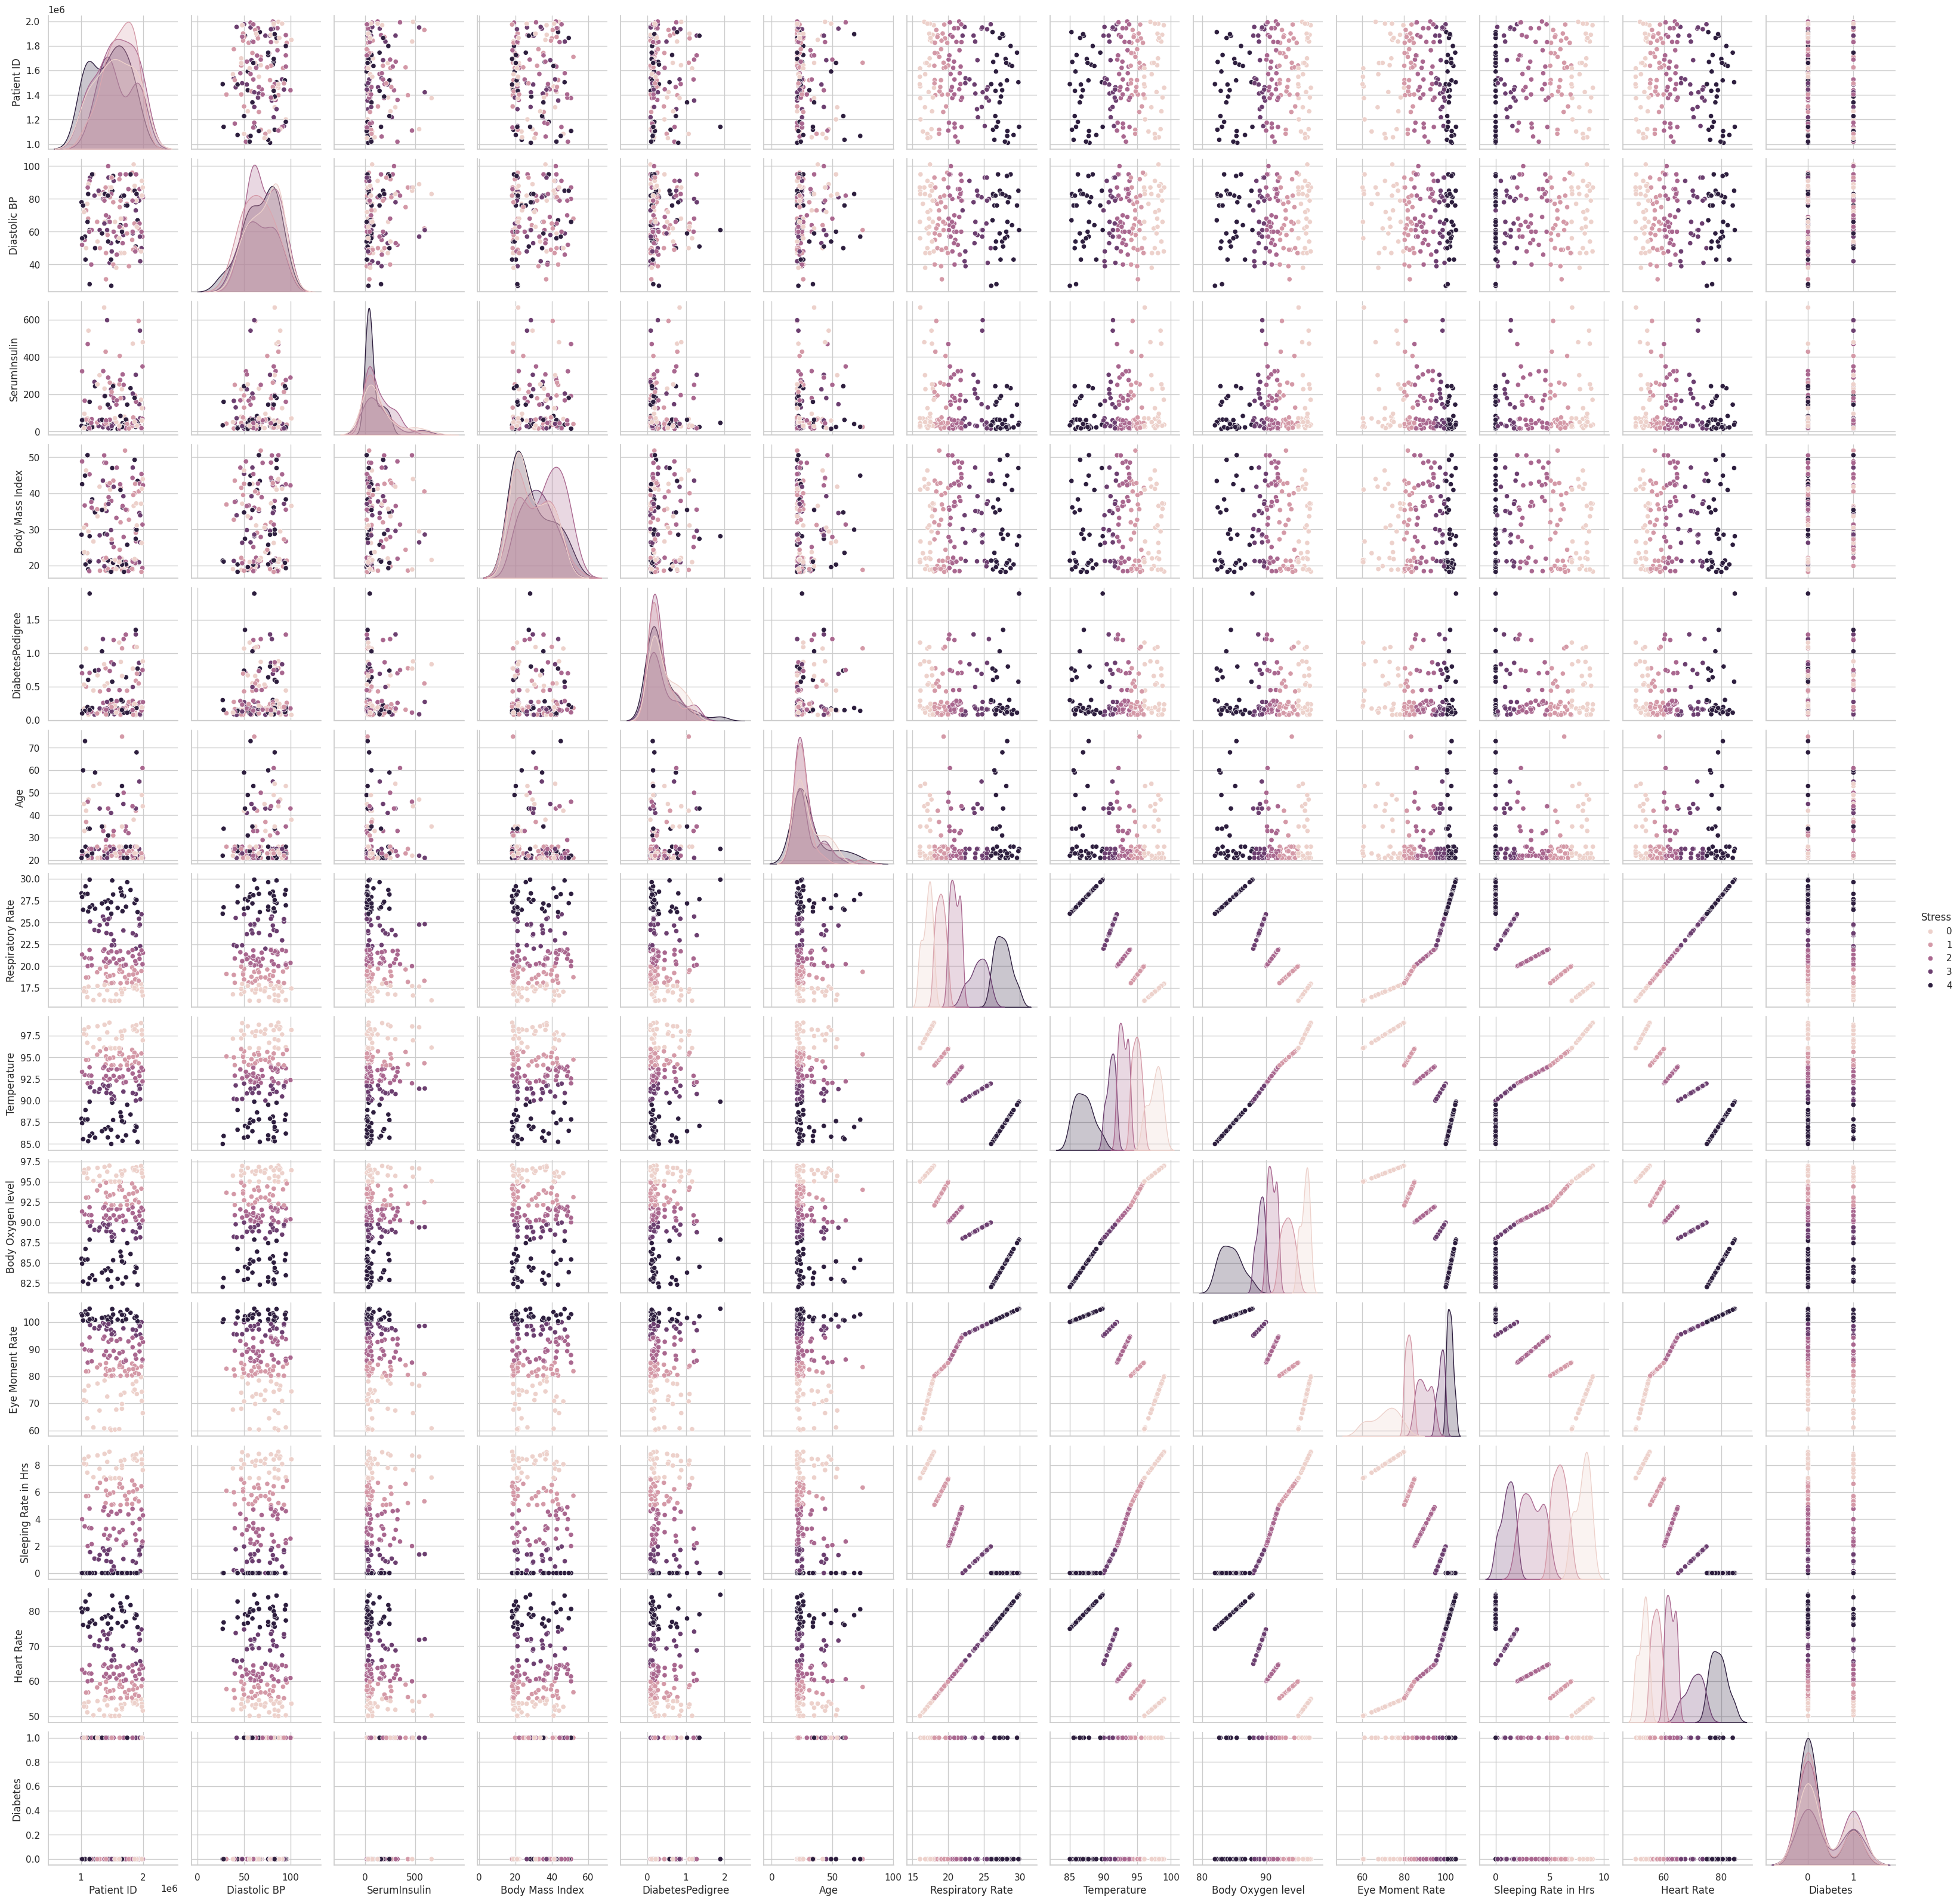

In [18]:
sns.pairplot(data,hue='Stress')

In [20]:
X = data.drop(columns=['Stress'])
Y = data['Stress']
print("Features Extraction Sucessfully")
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Features Extraction Sucessfully


In [33]:
from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.0776246  0.07310058 0.11876421 0.13539864 0.08161998 0.18966784
 0.04716187 0.05011778 0.05562829 0.04868268 0.04276172 0.05674594
 0.02272587]


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7333333333333333


In [36]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.5666666666666667


In [37]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

Accuracy Score: 0.8333333333333334


In [38]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.7666666666666667


In [45]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Random Forest','Xgboost'],
    'Score': [0.73,0.56,0.76,0.83]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df)

                     Model
Score                     
0.83               Xgboost
0.76         Random Forest
0.73   Logistic Regression
0.56                   KNN


In [39]:
X = data.drop(columns=['Diabetes'])
Y = data['Diabetes']
print("Features Extraction Sucessfully")

Features Extraction Sucessfully


In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.08044419 0.0739445  0.11677802 0.13262528 0.07411864 0.18472348
 0.04977196 0.05364551 0.05486729 0.05158895 0.0470778  0.05914897
 0.02126541]


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.6333333333333333


In [42]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.6666666666666666


In [43]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

Accuracy Score: 0.8666666666666667


In [44]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.7666666666666667


In [46]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Random Forest','Xgboost'],
    'Score': [0.63,0.66,0.76,0.86]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df)

                     Model
Score                     
0.86               Xgboost
0.76         Random Forest
0.66                   KNN
0.63   Logistic Regression
